## 5.2 Load Augmented Images to Tensorflow Dataset

In [4]:
import albumentations as alb
import os
import time
import cv2
import json  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
# Now we are gonna write a function that will load the images
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [21]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [22]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [23]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [24]:
train_images.as_numpy_iterator().next()

array([[[4.0153188e-01, 4.3376225e-01, 4.6274510e-01],
        [4.0147060e-01, 4.3676472e-01, 4.6066177e-01],
        [3.9871323e-01, 4.3400735e-01, 4.5361519e-01],
        ...,
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01],
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01],
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01]],

       [[4.0000001e-01, 4.3529412e-01, 4.5919117e-01],
        [4.0000001e-01, 4.3529412e-01, 4.5490196e-01],
        [3.9656863e-01, 4.3186274e-01, 4.5147058e-01],
        ...,
        [4.0392157e-01, 4.5098040e-01, 4.4313726e-01],
        [4.0392157e-01, 4.5098040e-01, 4.4313726e-01],
        [4.0637255e-01, 4.4852942e-01, 4.4313726e-01]],

       [[4.0392157e-01, 4.3921569e-01, 4.5882353e-01],
        [4.0392157e-01, 4.3921569e-01, 4.5882353e-01],
        [3.9950982e-01, 4.3480393e-01, 4.5441177e-01],
        ...,
        [4.0343139e-01, 4.5049021e-01, 4.4264707e-01],
        [4.0343139e-01, 4.5049021e-01, 4.4264707e-01],
        [4.0588236e-01

# 6. Prepare Labels

## 6.1 Build Label Loading Function

In [25]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## 6.2 Load Labels to Tensorflow Dataset

In [26]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [27]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [28]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2678, 0.1251, 0.681 , 0.6553], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Check Partition Lengths

In [30]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 840, 840)

## 7.2 Create Final Datasets (Images/Labels)

In [31]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [32]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [33]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [34]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.142  , 0.04562, 0.6216 , 0.6343 ],
        [0.516  , 0.1293 , 0.8633 , 0.566  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.1681 , 0.4    , 0.7764 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.518  , 0.0878 , 0.9062 , 0.642  ]], dtype=float16))

## 7.3 View Images and Annotations

In [35]:
data_samples = train.as_numpy_iterator()

In [36]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


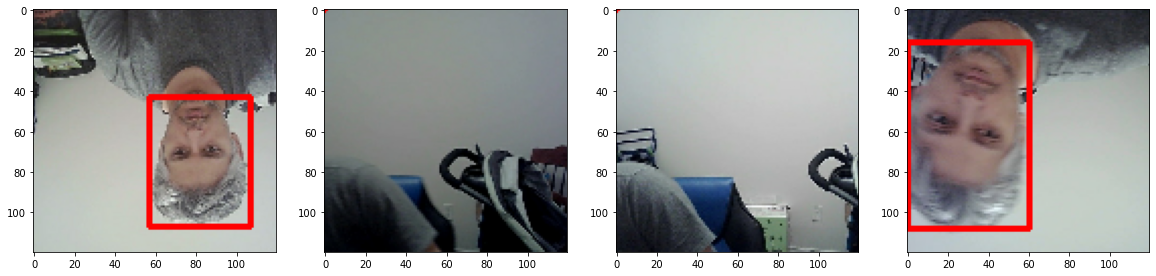

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

## 8.1 Import Layers and Base Network

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download VGG16

In [39]:
vgg = VGG16(include_top=False)

In [40]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [41]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

## 8.4 Test out Neural Network

In [42]:
facetracker = build_model()

In [43]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [44]:
X, y = train.as_numpy_iterator().next()

In [45]:
X.shape

(8, 120, 120, 3)

In [46]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 2s 2s/step


In [47]:
classes, coords

(array([[0.70241374],
        [0.71374595],
        [0.66405183],
        [0.6698745 ],
        [0.67946446],
        [0.6369905 ],
        [0.70318425],
        [0.6428882 ]], dtype=float32),
 array([[0.30856255, 0.50174075, 0.58482414, 0.34808916],
        [0.30661526, 0.52585316, 0.63286   , 0.3810278 ],
        [0.28582054, 0.4718674 , 0.595059  , 0.400432  ],
        [0.31880942, 0.49365196, 0.65312654, 0.5031303 ],
        [0.3240027 , 0.3974204 , 0.70136   , 0.38274547],
        [0.29284737, 0.44699612, 0.5527708 , 0.43970445],
        [0.3295785 , 0.5410959 , 0.5584155 , 0.43387184],
        [0.28669134, 0.49765652, 0.54975325, 0.42438188]], dtype=float32))

# 9. Define Losses and Optimizers

## 9.1 Define Optimizer and LR

In [48]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

## 9.2 Create Localization Loss and Classification Loss

In [50]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [51]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test out Loss Metrics

In [52]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0153503>

In [53]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.78027964>

In [54]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0153503>

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [55]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [56]:
model = FaceTracker(facetracker)

In [57]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])

465/465 [==============================] - 1123s 2s/step - total_loss: 0.1553 - class_loss: 0.0388 - regress_loss: 0.1359 - val_total_loss: 0.1607 - val_class_loss: 0.1561 - val_regress_loss: 0.0827


## 10.3 Plot Performance

In [62]:
hist.history

{'total_loss': [0.02830914780497551],
 'class_loss': [0.00010287575423717499],
 'regress_loss': [0.028257710859179497],
 'val_total_loss': [0.160740464925766],
 'val_class_loss': [0.1561070829629898],
 'val_regress_loss': [0.08268692344427109]}

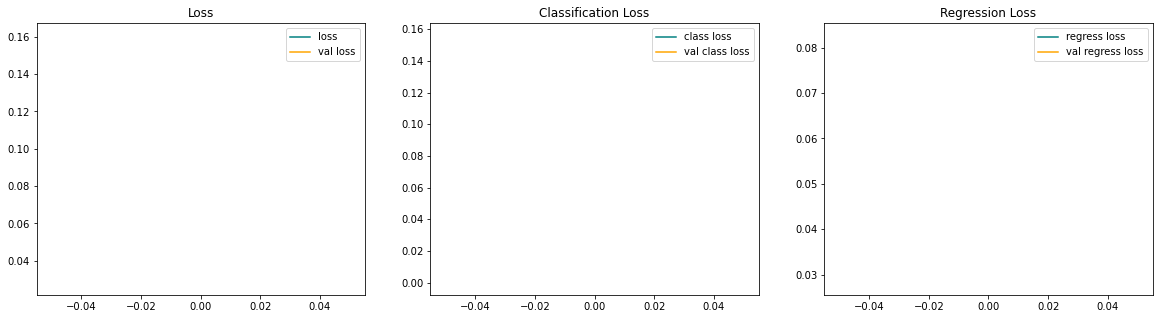

In [63]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [64]:
test_data = test.as_numpy_iterator()

In [65]:
test_sample = test_data.next()

In [66]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 681ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


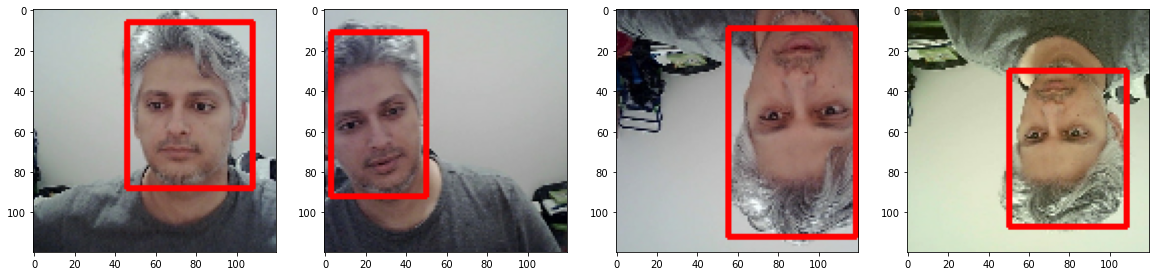

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [6]:
from tensorflow.keras.models import load_model

In [5]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [7]:
facetracker = load_model('facetracker.h5')


## 11.3 Real Time Detection

In [11]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 121ms/step
